# ADS 505 Final Project

## Best Home Regions

### Claire Bentzen, Jiaqi He, Sultan Mahmud Rahat

## 1. Data Preprocessing

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

from sklearn.decomposition import PCA

from dmba import regressionSummary

In [2]:
# read in data
homes = pd.read_csv('final_dataset.csv')
homes.head()

,MortgageRateConventionalFixed_2011-06,MortgageRateConventionalFixed_2011-07,MortgageRateConventionalFixed_2011-08,MortgageRateConventionalFixed_2011-09,MortgageRateConventionalFixed_2011-10,MortgageRateConventionalFixed_2011-11,MortgageRateConventionalFixed_2011-12,MortgageRateConventionalFixed_2012-01,MortgageRateConventionalFixed_2012-02,MortgageRateConventionalFixed_2012-03,...,PriceToRentRatio_2017-08,PriceToRentRatio_2017-09,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,New_Composite_Score
0,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,10.64,10.72,58196,1001,Agawam,MA,Springfield,Hampden,5770,0.243539
1,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,12.94,13.15,58197,1002,Amherst,MA,Springfield,Hampshire,4112,0.317422
2,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,11.36,11.50,58200,1005,Town of Barre,MA,Worcester,Worcester,11428,0.267254
3,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,12.94,12.77,58201,1007,Town of Belchertown,MA,Springfield,Hampshire,6855,0.305868
4,4.374217,4.460115,4.127827,3.963005,4.035497,3.941695,3.85004,3.815944,3.808312,3.931269,...,11.98,11.97,58202,1008,Blandford,MA,Springfield,Hampden,15088,0.281545


In [3]:
# identify number of rows and columns
homes.shape

(14233, 168)

#### Remove Columns used for Composite Score column

In [4]:
# drop most recent mortgage and price to rent columns
homes.drop(columns=['PriceToRentRatio_2017-09', 'MortgageRateConventionalFixed_2017-09'], inplace=True)

#### Check for Duplicate Records

In [5]:
# check for duplicates
duplicate_homes = homes[homes.duplicated()]
duplicate_homes.shape

(0, 166)

There are no duplicate records in the dataset.

#### Check for Missing Values

In [6]:
# check for overall percentage of missing values
missing_values = homes.isnull().sum().sum()
percent_missing = (missing_values / homes.size) * 100
print("Total percentage of missing data: {:.2f}%".format(percent_missing))

Total percentage of missing data: 1.65%


In [7]:
pd.set_option('display.max_rows', None)

# check which columns missing values reside in
missing_homes = homes.isnull().sum()
columns_missing_values = missing_homes[missing_homes > 0]

# turn missing values series into dataframe
columns_missing_values_df = columns_missing_values.to_frame()
columns_missing_values_df.columns = ['Count']

In [8]:
# missing values as percentages
columns_missing_values_percents = (columns_missing_values / homes.size) * 100

# turn missing values percentage series into dataframe
columns_missing_values_percents_df = columns_missing_values_percents.to_frame()
columns_missing_values_percents_df.columns = ['%']

In [9]:
# merge dataframes to display counts against percentages
missing = columns_missing_values_df.join(columns_missing_values_percents_df, how='inner')
missing

,Count,%
PriceToRentRatio_2010-10,994,0.042071
PriceToRentRatio_2010-11,1184,0.050113
PriceToRentRatio_2010-12,906,0.038346
PriceToRentRatio_2011-01,691,0.029246
PriceToRentRatio_2011-02,651,0.027553
PriceToRentRatio_2011-03,724,0.030643
PriceToRentRatio_2011-04,635,0.026876
PriceToRentRatio_2011-05,644,0.027257
PriceToRentRatio_2011-06,693,0.029331
PriceToRentRatio_2011-07,632,0.026749


In [10]:
# drop missing values in the dataset
homes = homes.dropna()
homes.shape

(12786, 166)

Although missing values only made up 1.65% of the overall dataset, we have dropped rows that contained missing values which brought the dataset to have 12,786 remaining records.

#### Select and Normalize Data

In [19]:
# convert categorical columns to type column
categorical = ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName']
homes[categorical] = homes[categorical].astype('category')

In [20]:
# select feature and target columns
feature_columns = [col for col in homes.columns if col not in categorical]
X = homes.drop(columns='New_Composite_Score')

y = homes['New_Composite_Score'].values.reshape(-1, 1)

In [21]:
# scale columns using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# apply MinMaxScaler to X and y
X_scaled = homes.copy()
X_scaled[feature_columns] = scaler_X.fit_transform(X_scaled[feature_columns])
y_scaled = scaler_y.fit_transform(y)

In [22]:
# drop all the mortgage columns since they are fixed and scale to 0
X_scaled = X_scaled.iloc[:, 75:]

In [23]:
# one-hot encode categorical variable
X_scaled = pd.get_dummies(X_scaled, columns=categorical)

#### Principal Component Analysis

In [24]:
pca = PCA(n_components = 8)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(12786, 8)

#### Split into Train, Validation, and Test Sets

In [27]:
# split data into 30% test, 30% validation, and 40% train
X_temp, X_test, y_temp, y_test = train_test_split(X_pca, y_scaled, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

## 2. Exploratory Data Analysis

## 3. Modeling

#### Multiple Linear Regression

In [45]:
# train the model on the training set
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [46]:
# apply model to validation set
val_pred_ml = ml.predict(X_val)

In [47]:
# evaluate the model with R2 Score on validation set
r2_score(y_val, val_pred_ml)

0.9425723835040719

In [48]:
# regression summary
regressionSummary(y_val, val_pred_ml)


Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0271
            Mean Absolute Error (MAE) : 0.0199
          Mean Percentage Error (MPE) : -1.6846
Mean Absolute Percentage Error (MAPE) : 8.6534


Text(0.5, 1.0, 'Multiple Linear Regression Model - Actual vs Predicted')

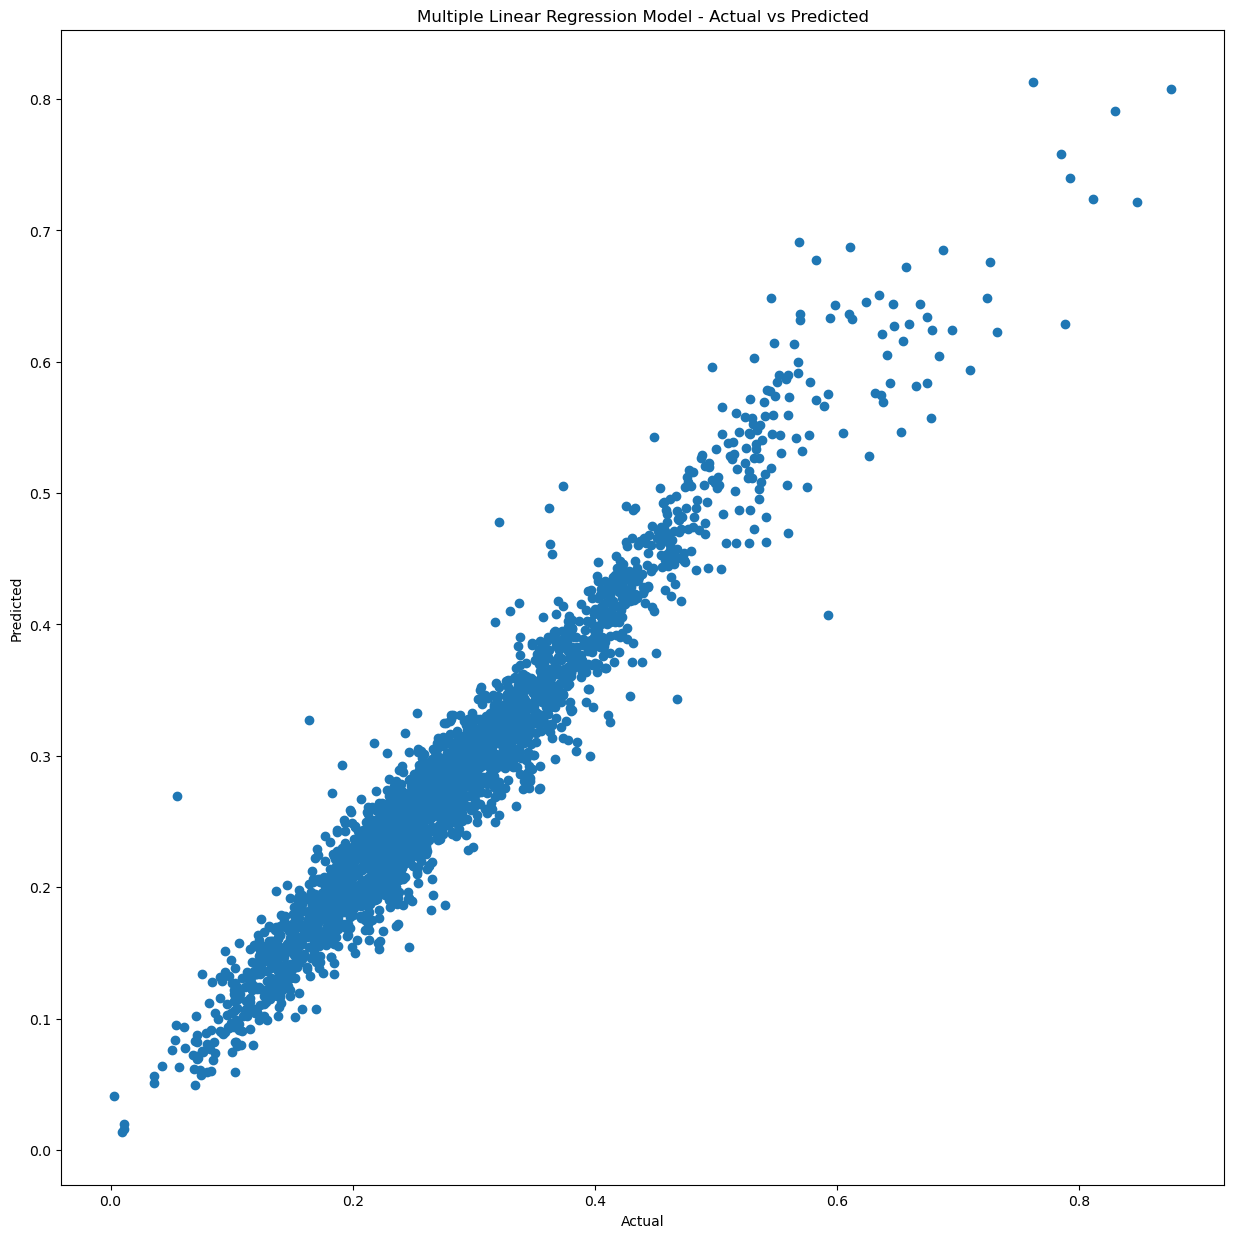

In [58]:
# plot the results
plt.figure(figsize=(15,15))
plt.scatter(y_val, val_pred_ml)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression Model - Actual vs Predicted')

In [50]:
# predicted values
pred_val_df = pd.DataFrame({'Actual Value': y_val.ravel(), 'Predicted Value': val_pred_ml.ravel(), 'Residual':y_val.ravel()-val_pred_ml.ravel()})
display(pred_val_df.head())

,Actual Value,Predicted Value,Residual
0,0.192460,0.250809,-0.058349
1,0.164792,0.177572,-0.012780
2,0.220736,0.198892,0.021843
3,0.269383,0.305045,-0.035662
4,0.134387,0.129617,0.004770


#### Random Forest

In [51]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 10)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=10)

In [52]:
# apply model to validation set
val_pred_rf = rf.predict(X_val)

In [53]:
# evaluate the model with R2 Score on validation set
r2_score(y_val, val_pred_rf)

0.9610979407298195

In [54]:
# regression summary
regressionSummary(y_val, val_pred_rf)


Regression statistics

                      Mean Error (ME) : -0.0004
       Root Mean Squared Error (RMSE) : 0.0223
            Mean Absolute Error (MAE) : 0.0156
          Mean Percentage Error (MPE) : -1.4378
Mean Absolute Percentage Error (MAPE) : 6.8257


Text(0.5, 1.0, 'Random Forest Model - Actual vs Predicted')

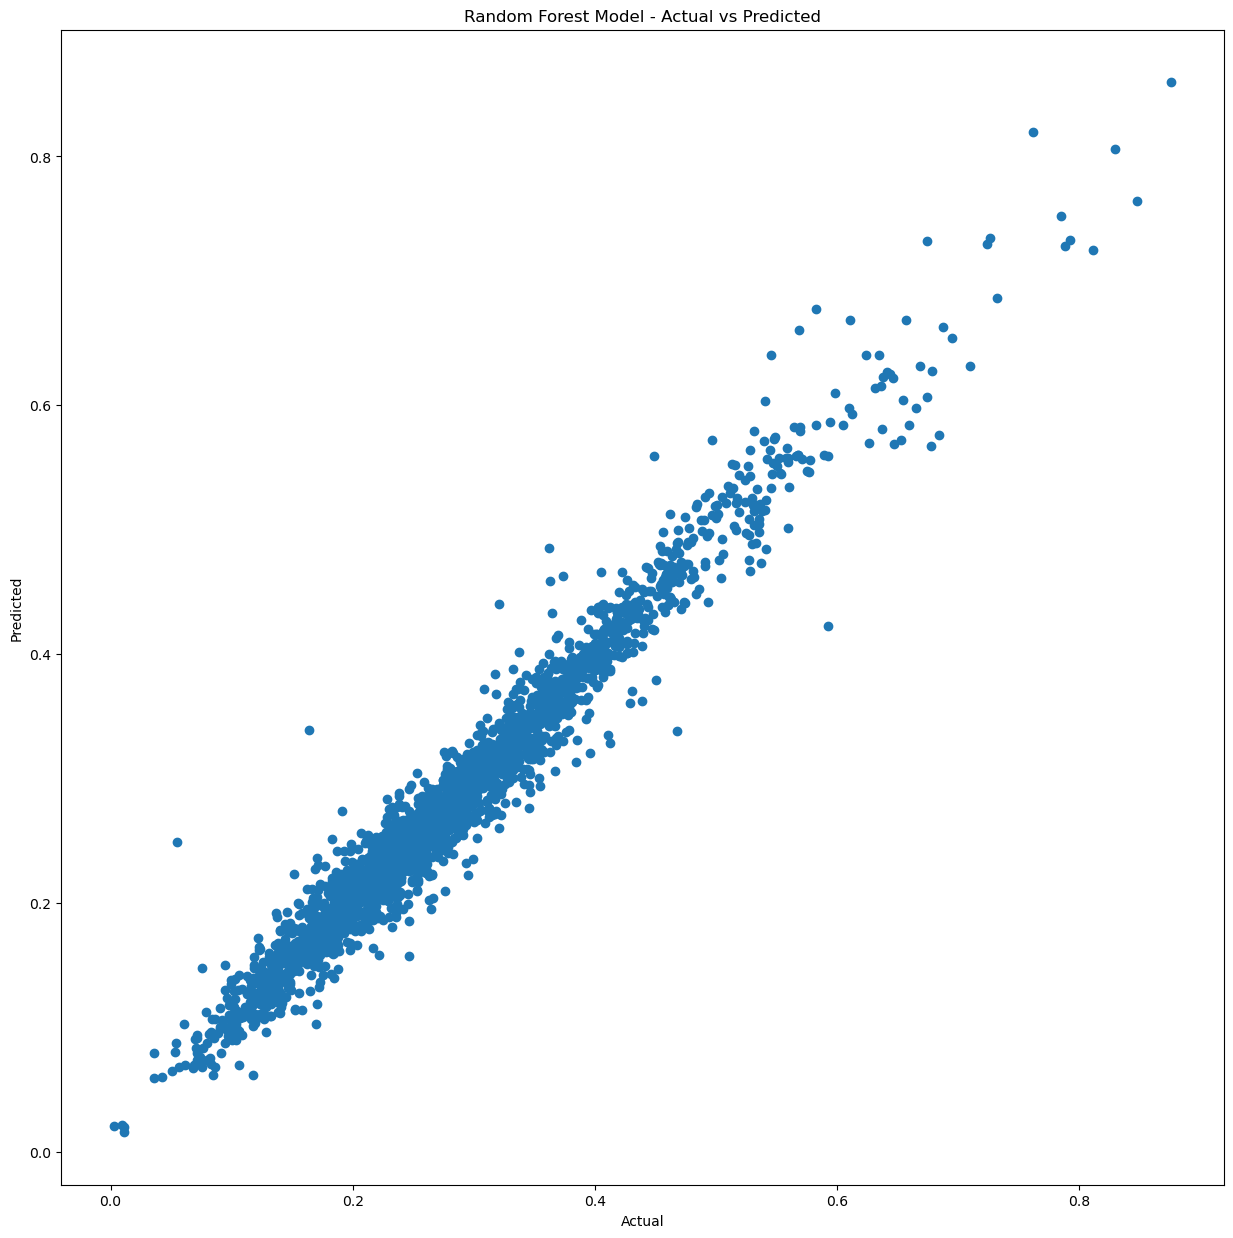

In [59]:
# plot the results
plt.figure(figsize=(15,15))
plt.scatter(y_val, val_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Model - Actual vs Predicted')